In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="talk")

from sklearn.model_selection import train_test_split

from jcopml.plot import plot_confusion_matrix

# Load Model

In [5]:
model = pickle.load(open(r"model_xgb.pkl", 'rb'))

# Import Dataset

In [7]:
df = pd.read_csv("../Datasets/heart.csv")

In [8]:
Q1 = df["trestbps"].quantile(0.25) #membuat Q1
Q3 = df["trestbps"].quantile(0.75) #membuat Q3

IQR = Q3 - Q1 #menghitung IQR
print(f"IQR = {IQR}\nQ1 = {Q1}\nQ3 = {Q3}")

batas_bawah = Q1-(1.5*IQR)
batas_atas = Q3+(1.5*IQR)

print(f"batas bawah: {batas_bawah}\nbatas atas: {batas_atas}")

df = df[(df["trestbps"]>=batas_bawah) & (df["trestbps"]<=batas_atas)] #filter outlier
df.reset_index(drop=True, inplace=True) #reset index

IQR = 20.0
Q1 = 120.0
Q3 = 140.0
batas bawah: 90.0
batas atas: 170.0


In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
X = df.drop(columns="target", axis="columns")
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((235, 13), (59, 13), (235,), (59,))

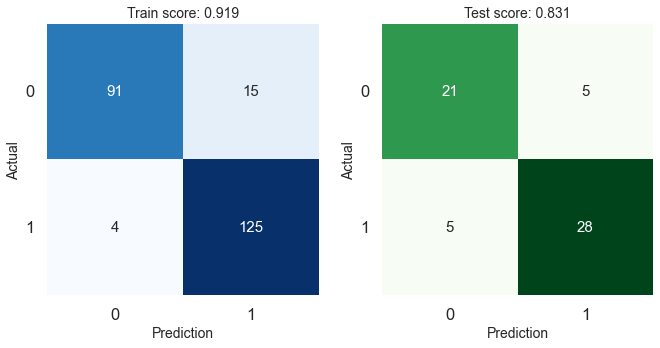

In [11]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)